<a href="https://colab.research.google.com/github/Yashmitha22/ML_projects/blob/main/stockprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('all_stocks_5yr.csv', delimiter=',', on_bad_lines='skip')
print(data.shape)
print(data.sample(7))

(109179, 7)
             date    open    high     low   close     volume  Name
40898  2016-04-22   50.85   51.23   50.75   51.14  1015344.0   AME
54510  2015-05-14   62.93   63.55   62.42   62.63  2777674.0   APA
65217  2017-09-18  251.05  252.83  248.61  249.82  2574276.0  AVGO
69788  2015-11-11  212.84  213.80  210.92  212.36   226020.0   AYI
69057  2017-12-15   97.86   98.84   97.44   98.52  7891763.0   AXP
76529  2017-08-21  235.77  236.94  234.35  235.68  2545355.0    BA
66804  2014-01-07   41.38   41.75   41.37   41.71   769919.0   AWK


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109179 entries, 0 to 109178
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    109179 non-null  object 
 1   open    109178 non-null  float64
 2   high    109177 non-null  float64
 3   low     109177 non-null  float64
 4   close   109178 non-null  float64
 5   volume  109178 non-null  float64
 6   Name    109178 non-null  object 
dtypes: float64(5), object(2)
memory usage: 5.8+ MB


In [7]:
data['date'] = pd.to_datetime(data['date'])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109179 entries, 0 to 109178
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    109179 non-null  datetime64[ns]
 1   open    109178 non-null  float64       
 2   high    109177 non-null  float64       
 3   low     109177 non-null  float64       
 4   close   109178 non-null  float64       
 5   volume  109178 non-null  float64       
 6   Name    109178 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 5.8+ MB


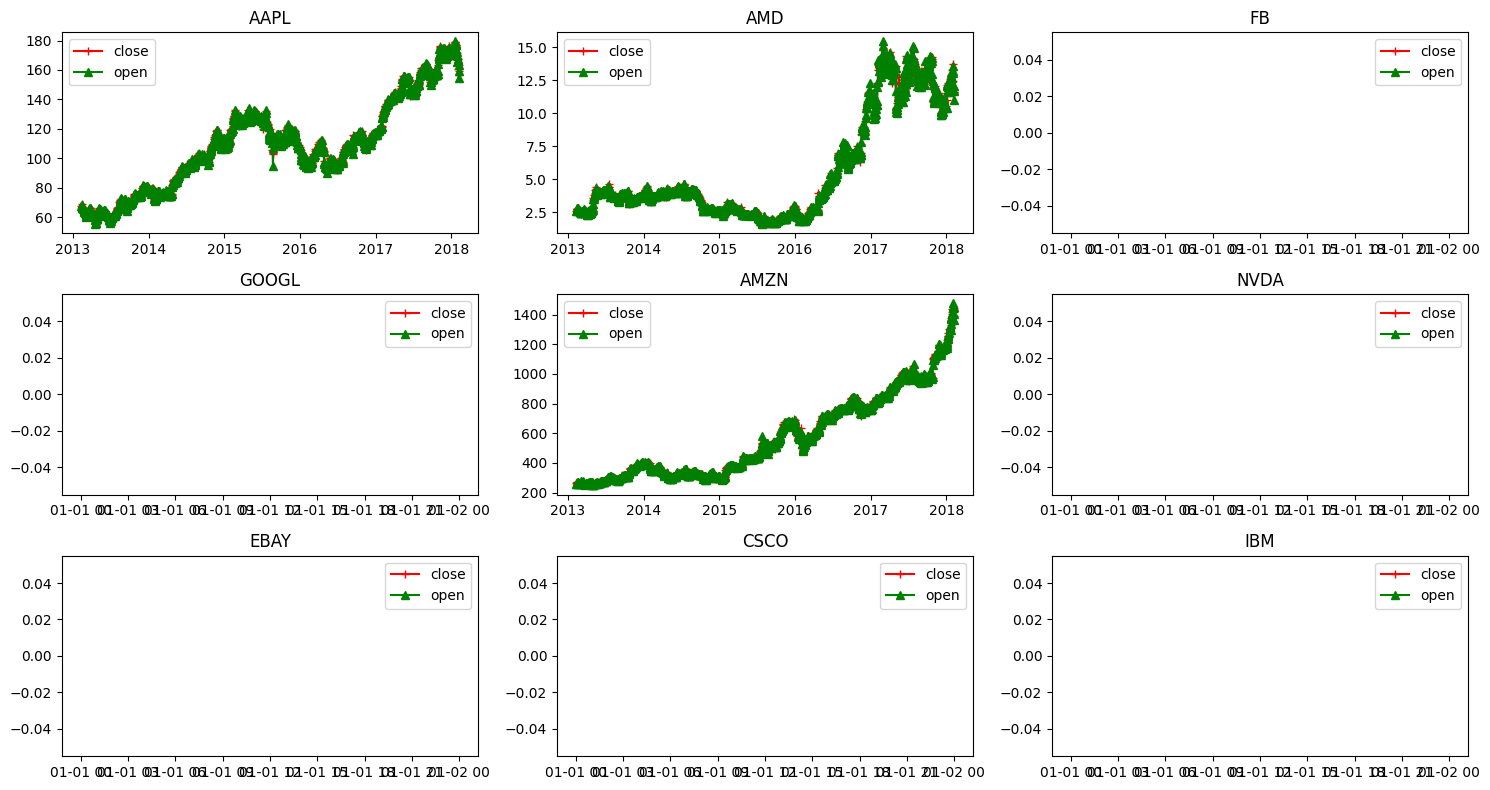

In [8]:
data['date'] = pd.to_datetime(data['date'])

companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']

plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['close'], c="r", label="close", marker="+")
    plt.plot(c['date'], c['open'], c="g", label="open", marker="^")
    plt.title(company)
    plt.legend()
    plt.tight_layout()


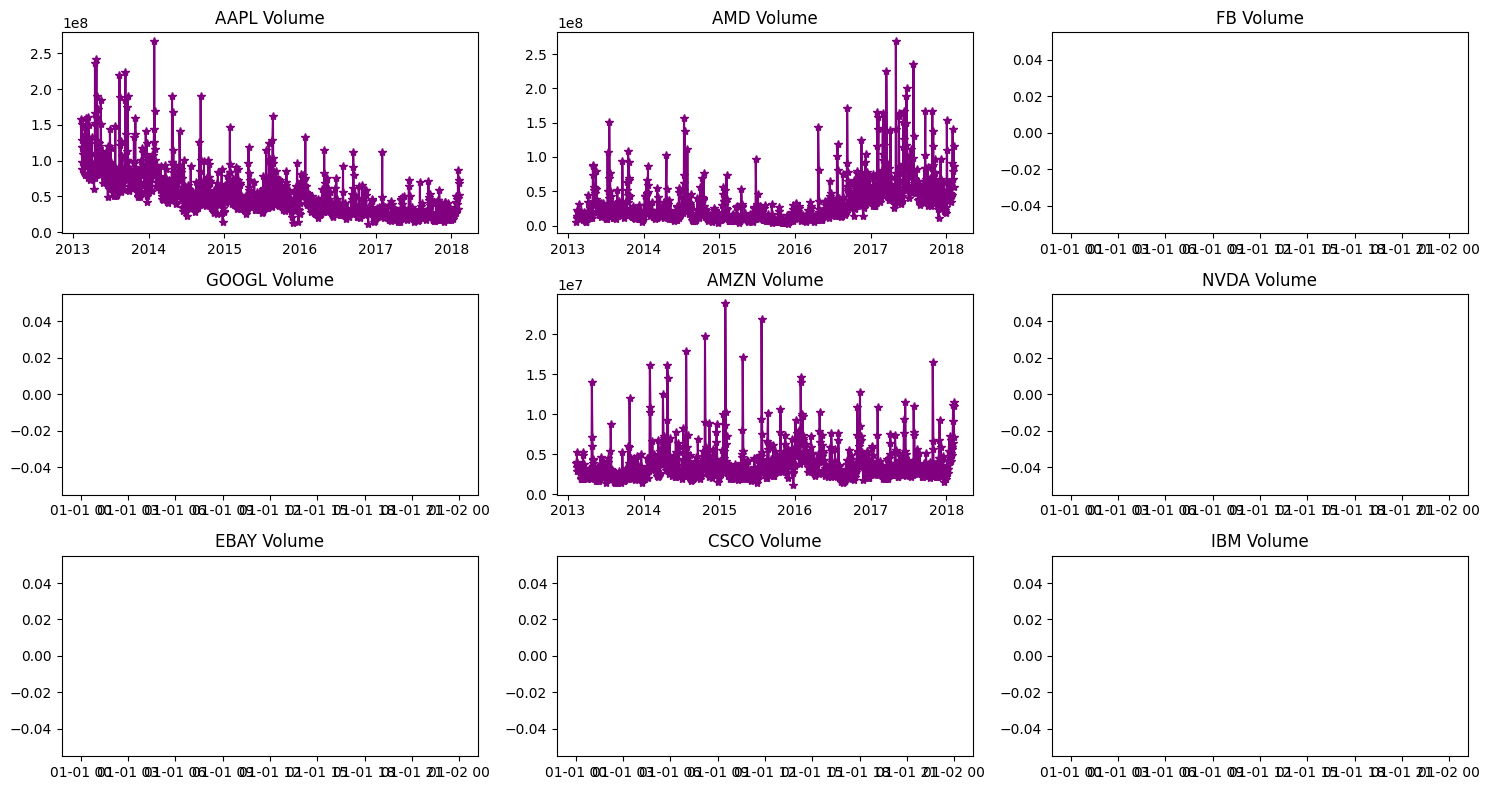

In [9]:
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['volume'], c='purple', marker='*')
    plt.title(f"{company} Volume")
    plt.tight_layout()


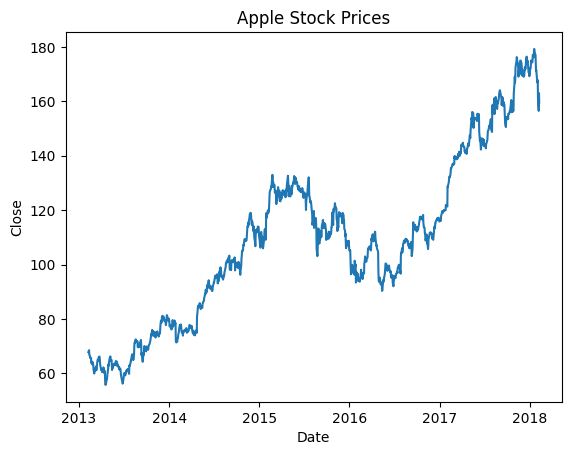

In [10]:
apple = data[data['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1))
 & (apple['date']<datetime(2018,1,1))]
plt.plot(apple['date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()


In [11]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)


1197


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [14]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary


<bound method Model.summary of <Sequential name=sequential, built=True>>

In [15]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0584
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0092
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0103
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0088
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0079
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0072
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0069
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0068
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0071
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0057


In [16]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 372ms/step
MSE 24.045778570905586
RMSE 4.903649515504303


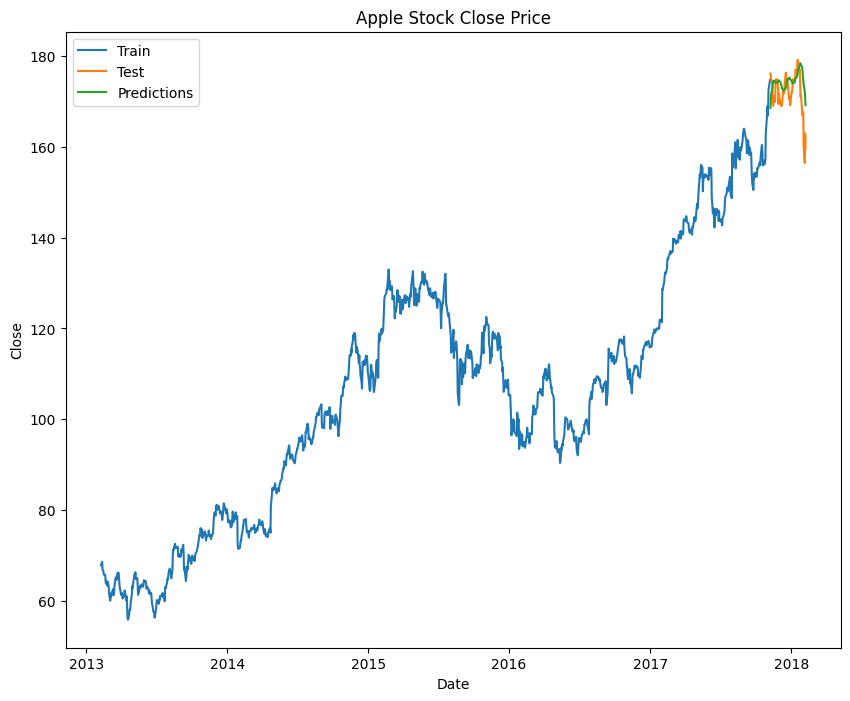

In [17]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])

# This code is modified by Susobhan Akhuli
